In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 80% !important; }</style>"))

In [3]:
import sys
import time
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import colors

In [4]:
myColors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
            '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
            '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 
            '#307D7E', '#000000', "#DDEFFF", "#000035", "#7B4F4B", 
            "#A1C299", "#300018", "#C2FF99", "#0AA6D8", "#013349", 
            "#00846F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", 
            "#1E6E00", "#DFFB71", "#868E7E", "#513A01", "#CCAA35"]

colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
import smashpy
sf = smashpy.smashpy()

 * Initialising ...



# Loading annData object

In [7]:
obj = sc.read_h5ad('../../../External_datasets/CITEseq.h5ad')

In [8]:
obj.raw = obj.copy()
obj.layers["nome"] = obj.X.copy()
obj.layers["log"] = obj.X.copy()
obj.layers["scale"] = obj.X.copy()

In [9]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

500 genes across 8617 cells


#### DNN

In [10]:
s2 = time.time()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                16032     
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0

69/69 [==============================] - 0s 4ms/step - loss: 0.2346 - accuracy: 0.9037 - auc: 0.9962 - precision: 0.9394 - recall: 0.8519 - val_loss: 0.2864 - val_accuracy: 0.9113 - val_auc: 0.9970 - val_precision: 0.9285 - val_recall: 0.8892

Epoch 00042: val_loss did not improve from 0.28137
Epoch 43/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2176 - accuracy: 0.9013 - auc: 0.9965 - precision: 0.9353 - recall: 0.8507 - val_loss: 0.2745 - val_accuracy: 0.9142 - val_auc: 0.9971 - val_precision: 0.9302 - val_recall: 0.8973

Epoch 00043: val_loss improved from 0.28137 to 0.27447, saving model to weights/best_model_labels.h5
Epoch 44/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2129 - accuracy: 0.8920 - auc: 0.9958 - precision: 0.9248 - recall: 0.8422 - val_loss: 0.2702 - val_accuracy: 0.9182 - val_auc: 0.9972 - val_precision: 0.9323 - val_recall: 0.9026

Epoch 00044: val_loss improved from 0.27447 to 0.27021, saving model to weights/best_model

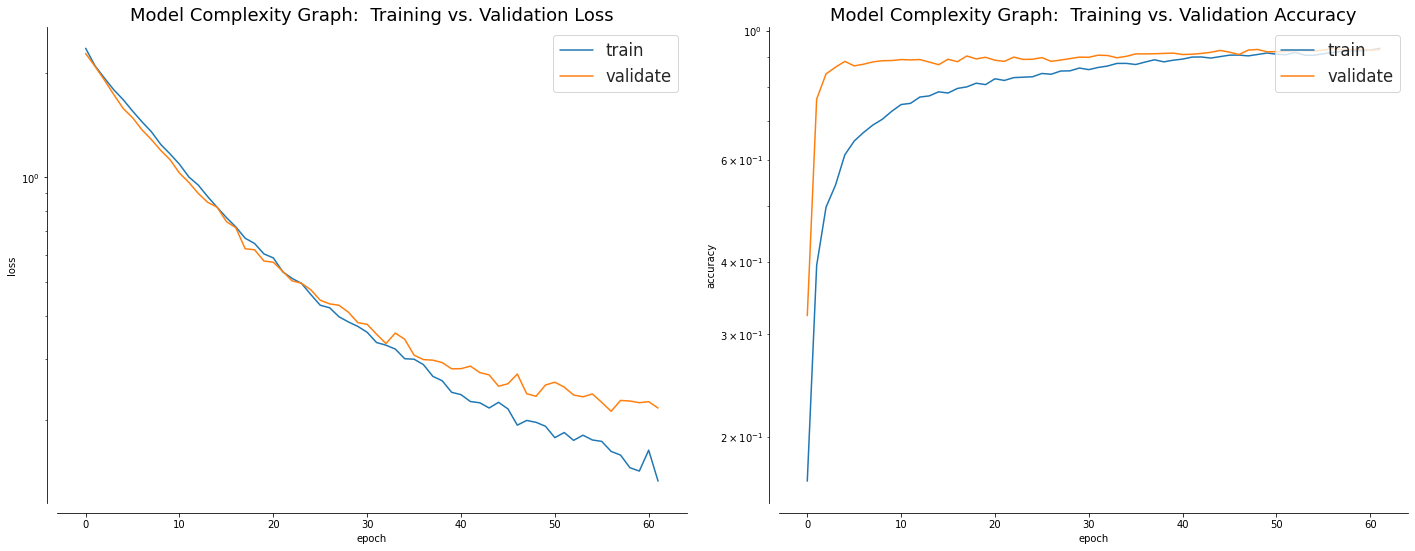

<Figure size 432x288 with 0 Axes>

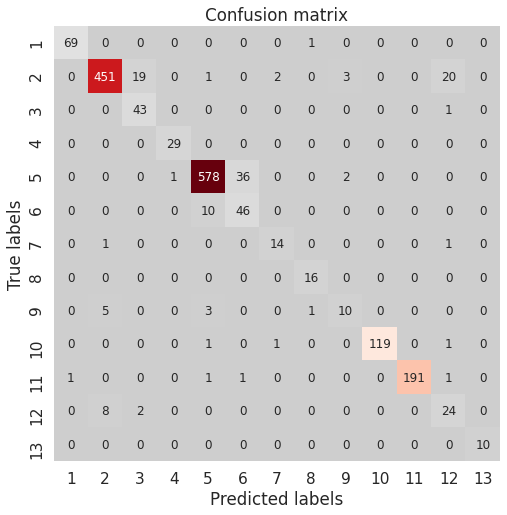

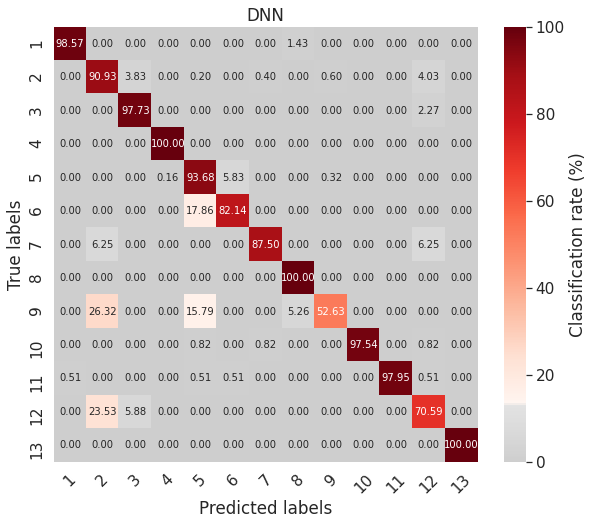

              precision    recall  f1-score   support

           1       0.99      0.99      0.99        70
           2       0.97      0.91      0.94       496
           3       0.67      0.98      0.80        44
           4       0.97      1.00      0.98        29
           5       0.97      0.94      0.95       617
           6       0.55      0.82      0.66        56
           7       0.82      0.88      0.85        16
           8       0.89      1.00      0.94        16
           9       0.67      0.53      0.59        19
          10       1.00      0.98      0.99       122
          11       1.00      0.98      0.99       195
          12       0.50      0.71      0.59        34
          13       1.00      1.00      1.00        10

    accuracy                           0.93      1724
   macro avg       0.85      0.90      0.87      1724
weighted avg       0.94      0.93      0.93      1724

54/54 [==============================] - 0s 1ms/step - loss: 0.2123 - accuracy:

In [11]:
sf.DNN(obj, group_by="labels", model=None, balance=True, verbose=True, save=True)

####Â Shap value

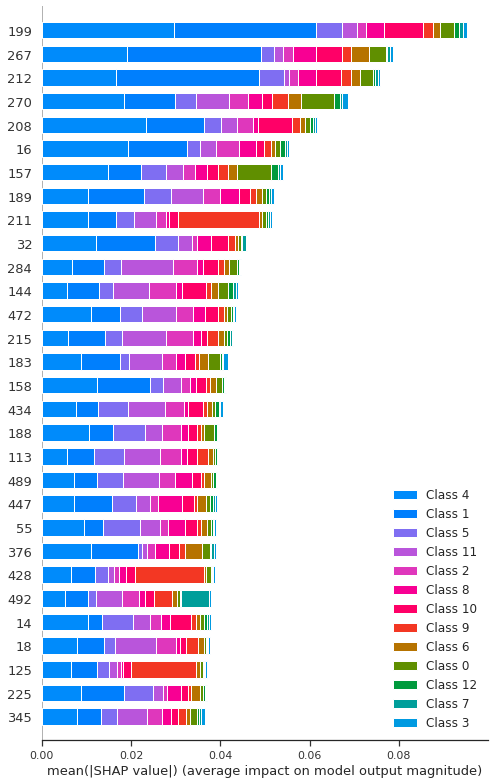

In [12]:
selectedGenes, selectedGenes_dict = sf.run_shap(obj, group_by="labels", model=None, verbose=True, pct=0.1, restrict_top=("local", 20))

In [13]:
e2 = time.time()

#### Classifiers

<Figure size 432x288 with 0 Axes>

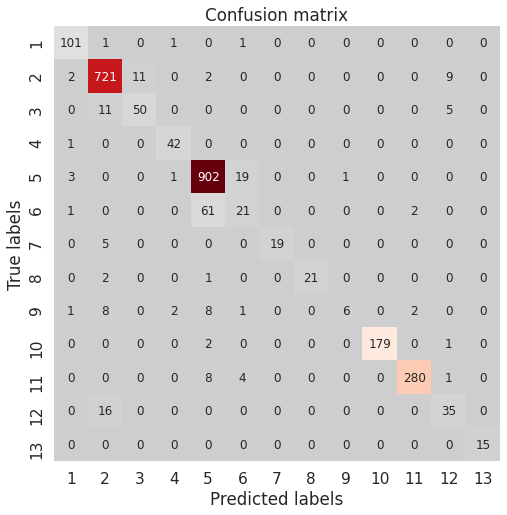

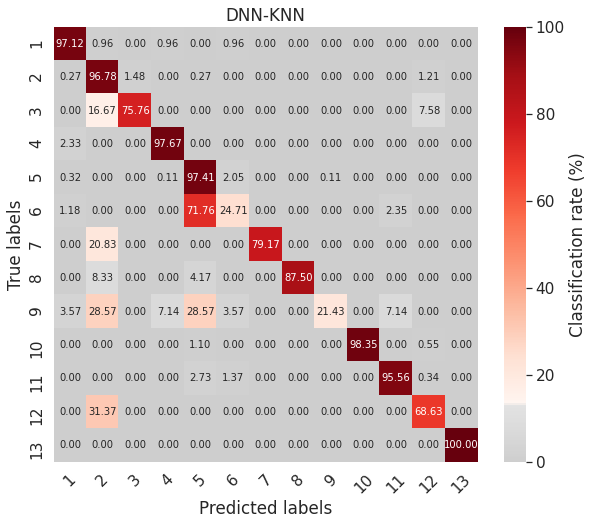

Accuracy: 0.9249806651198763: Misclassification: 0.07501933488012369
              precision    recall  f1-score   support

           1       0.93      0.97      0.95       104
           2       0.94      0.97      0.96       745
           3       0.82      0.76      0.79        66
           4       0.91      0.98      0.94        43
           5       0.92      0.97      0.94       926
           6       0.46      0.25      0.32        85
           7       1.00      0.79      0.88        24
           8       1.00      0.88      0.93        24
           9       0.86      0.21      0.34        28
          10       1.00      0.98      0.99       182
          11       0.99      0.96      0.97       293
          12       0.69      0.69      0.69        51
          13       1.00      1.00      1.00        15

    accuracy                           0.92      2586
   macro avg       0.89      0.80      0.82      2586
weighted avg       0.92      0.92      0.92      2586



In [14]:
sf.run_classifiers(obj, group_by="labels", genes=selectedGenes, classifier="KNN", balance=True, title="DNN-KNN", save=True)

#### Sorting genes per cluster

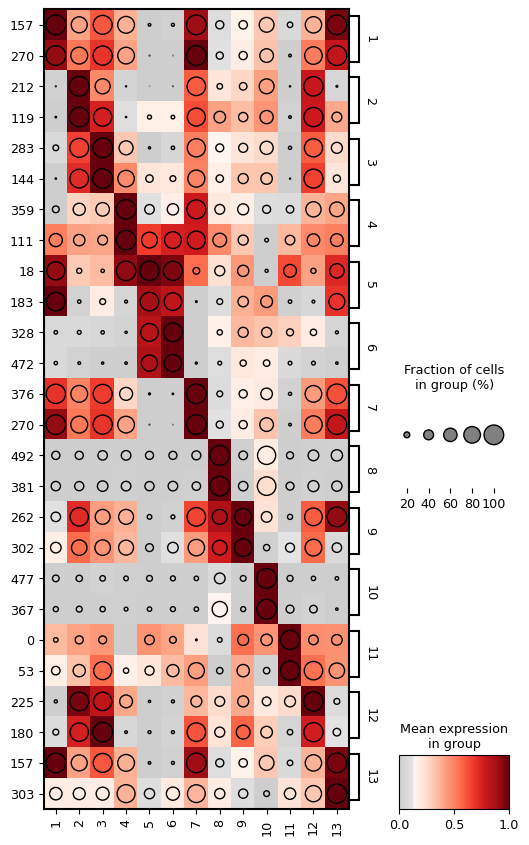

In [15]:
axs, selectedGenes_top_dict = sf.sort_and_plot(obj, selectedGenes, group_by="labels", top=2, figsize=(6,10), restricted=False)

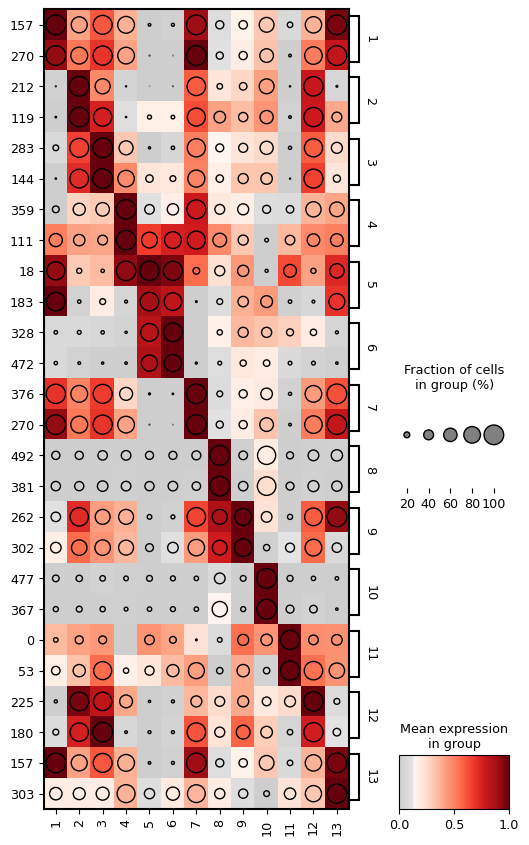

In [16]:
axs.savefig("Figures/DNN_top5_perGroup.pdf")

# Elapsed time

In [17]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

500 genes across 8617 cells


In [18]:
print('Elapsed time (s): ', e2-s2)

Elapsed time (s):  56.31539225578308
